### Librerías

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Llamado Dataset

In [2]:
# Obtener el directorio actual de trabajo
directorio_actual = os.getcwd()

# Especificar la ruta relativa desde el directorio actual
ruta_csv_relativa = os.path.join('..', 'data', '02_intermediate','2.spotifySinOutlier.csv')

# Cargar el archivo CSV
spotify = pd.read_csv(ruta_csv_relativa)

# Mostrar las primeras filas del DataFrame
spotify.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,log_popularity,log_duration_ms
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,4.304065,12.348730
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,4.025352,11.915794
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,4.060443,12.258793
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,4.276666,12.215696
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.618,0.4430,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,4.418841,12.200326
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58.0,214240.0,False,0.688,0.4810,...,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic,4.077537,12.274857
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74.0,229400.0,False,0.407,0.1470,...,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic,4.317488,12.343227
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80.0,242946.0,False,0.703,0.4440,...,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic,4.394449,12.400599
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74.0,189613.0,False,0.625,0.4140,...,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic,4.317488,12.152746
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56.0,205594.0,False,0.442,0.6320,...,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic,4.043051,12.233663


## Escalado de datos

Este escalado de variables es para poder trabajar con los modelos en un futuro

### duration_ms Scaler

In [3]:
# Crear un objeto StandardScaler
scaler = MinMaxScaler()

# Seleccionar solo la columna de popularidad para escalar
spotify['duration_ms_scaled'] = scaler.fit_transform(spotify[['log_duration_ms']])

# Mostrar las primeras filas para verificar
spotify[['duration_ms', 'duration_ms_scaled']].head()


,duration_ms,duration_ms_scaled
0,230666.0,0.461947
1,149610.0,0.387347
2,210826.0,0.446450
3,201933.0,0.439024
4,198853.0,0.436375


### population Scaler

In [4]:
# Crear un objeto StandardScaler
scaler = MinMaxScaler()

# Seleccionar solo la columna de popularidad para escalar
spotify['popularity_scaled'] = scaler.fit_transform(spotify[['log_popularity']])

# Mostrar las primeras filas para verificar
spotify[['popularity', 'popularity_scaled']].head()


,popularity,popularity_scaled
0,73.0,0.920689
1,55.0,0.849624
2,57.0,0.858572
3,71.0,0.913703
4,82.0,0.949954


### Group feature Scaler

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las características numéricas para escalar
features_to_scale = ['danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 
                     'valence', 'tempo']

scaler = MinMaxScaler()
spotify[features_to_scale] = scaler.fit_transform(spotify[features_to_scale])

print('Caracteristicas escaladas: ', features_to_scale)

Caracteristicas escaladas:  ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


## Creación de nuevas característica

### duration_ms a tiempo_ms_seconds

La duración_ms se calculo para que los valores de milisegundos se pasen a minutos y segundos

In [6]:
# Convertir milisegundos a segundos
spotify['tiempo_ms_seconds'] = spotify['duration_ms'] / 1000

# Función para convertir segundos a formato de minutos y segundos
def segundos_a_formato(segundos):
    minutos = int(segundos // 60)
    segundos_restantes = int(segundos % 60)
    return f"{minutos} minuto{'s' if minutos != 1 else ''} con {segundos_restantes} segundo{'s' if segundos_restantes != 1 else ''}"

# Aplicar la función a la columna de segundos
spotify['duration_ms_scaled'] = spotify['tiempo_ms_seconds'].apply(segundos_a_formato)

# Mostrar los primeros 10 valores formateados
print(spotify['duration_ms_scaled'].head(10))


0    3 minutos con 50 segundos
1    2 minutos con 29 segundos
2    3 minutos con 30 segundos
3    3 minutos con 21 segundos
4    3 minutos con 18 segundos
5    3 minutos con 34 segundos
6    3 minutos con 49 segundos
7     4 minutos con 2 segundos
8     3 minutos con 9 segundos
9    3 minutos con 25 segundos
Name: duration_ms_scaled, dtype: object


### tranck_genre a Label Encoding

Cambiar la etiqueta categórica de track_genre a un valor numérico.

In [7]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador de etiquetas
le = LabelEncoder()

# Aplicar Label Encoding a la columna 'track_genre'
spotify['track_genre_encoded'] = le.fit_transform(spotify['track_genre'])

# Ver las primeras filas para verificar la codificación
print(spotify[['track_genre', 'track_genre_encoded']].head())


  track_genre  track_genre_encoded
0    acoustic                    0
1    acoustic                    0
2    acoustic                    0
3    acoustic                    0
4    acoustic                    0


### Nueva variable "Intensity"

Al tener una buena correlación gracias a la matriz, decidimos optar por juntar la energy con la danceability

In [8]:
# Crear una nueva columna de "intensidad"
spotify['intensity'] = spotify['energy'] * spotify['danceability']

spotify['intensity'].head(10)

0    0.308429
1    0.065544
2    0.148678
3    0.013700
4    0.268868
5    0.327992
6    0.055994
7    0.309893
8    0.254370
9    0.264453
Name: intensity, dtype: float64

# Exploración Target

C:\Users\Cracklitrox\Desktop\Spotify-Recomendation-Machine-Learning\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cracklitrox\Desktop\Spotify-Recomendation-Machine-Learning\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cracklitrox\Desktop\Spotify-Recomendation-Machine-Learning\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


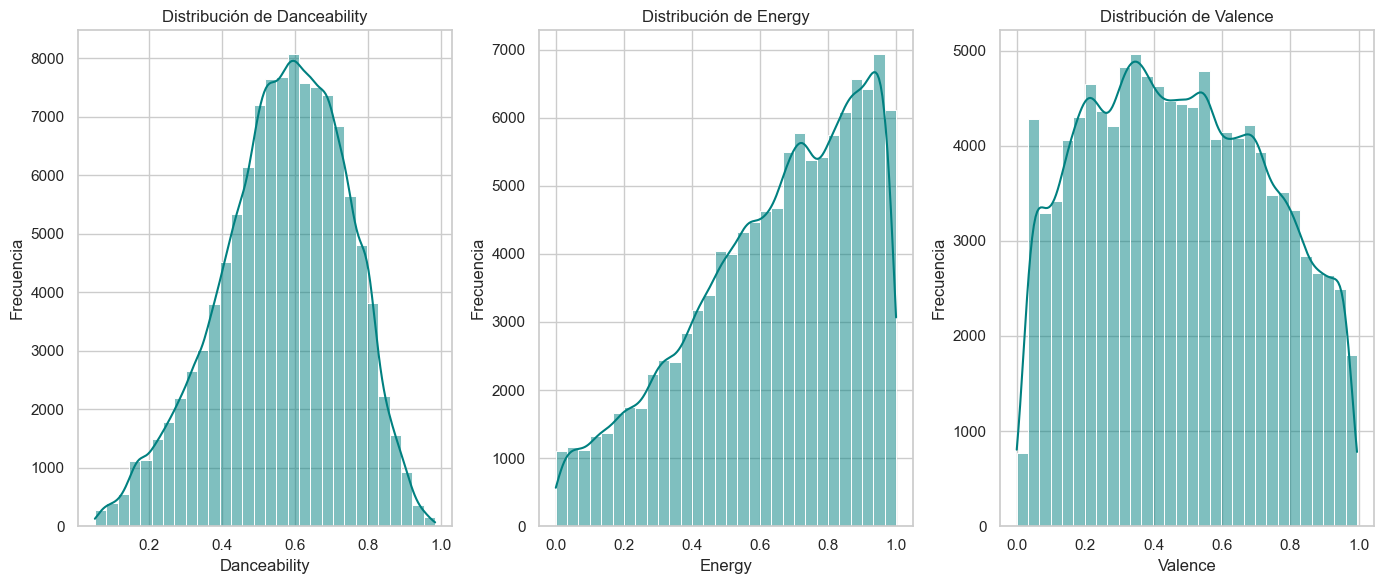

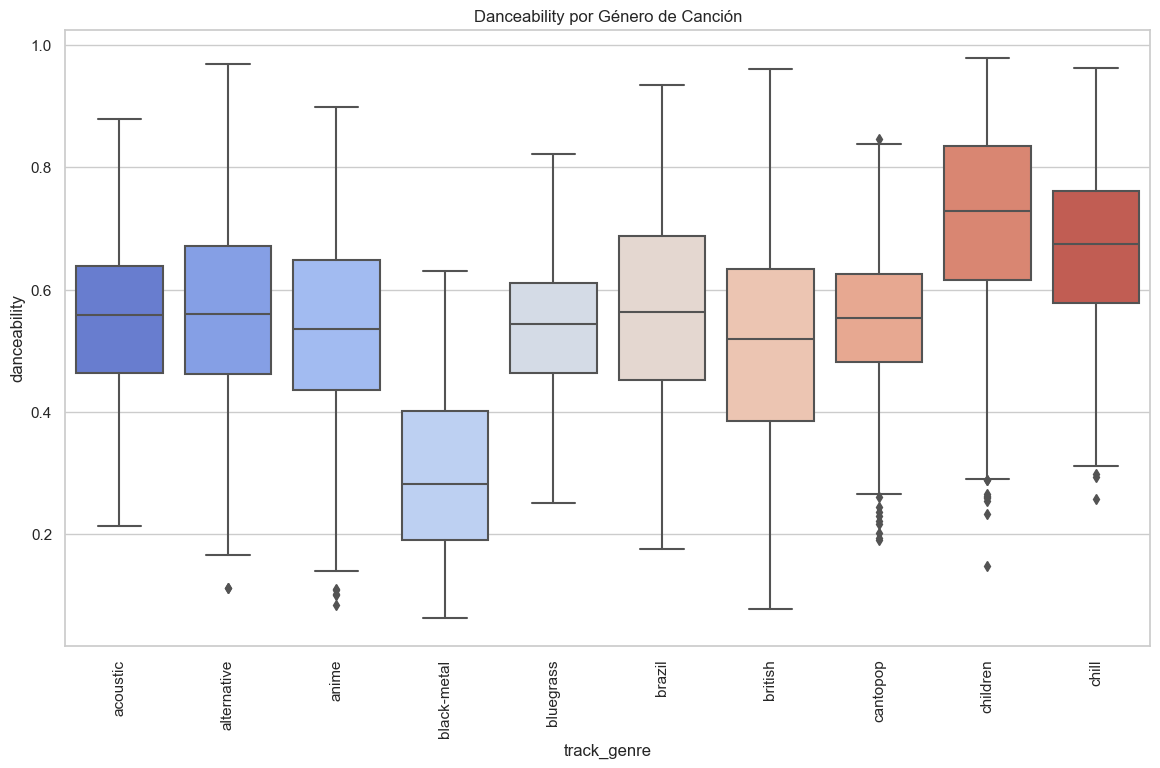

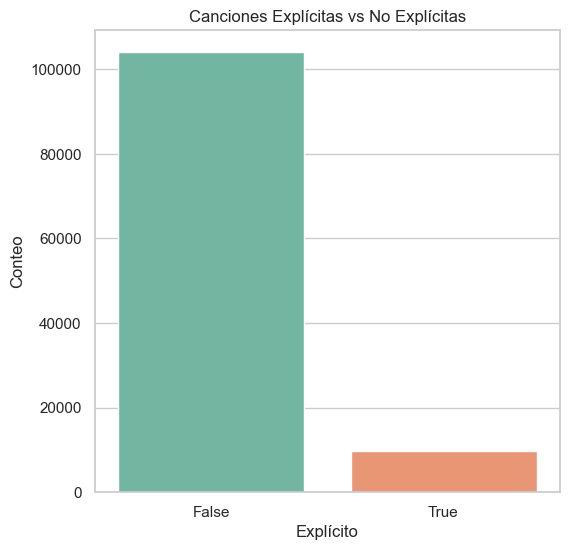

In [9]:
# Cargar el archivo CSV
spotify = pd.read_csv(ruta_csv_relativa)
# Reemplazar valores infinitos por NaN en todo el DataFrame
spotify.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
# Configurar estilo de gráficos
sns.set(style="whitegrid")
# 1. Distribución de las características que afectan recomendaciones (danceability, energy, valence)
plt.figure(figsize=(14,6))
# Subplots para cada característica
for i, feature in enumerate(['danceability', 'energy', 'valence'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(spotify[feature].dropna(), bins=30, kde=True, color='teal')
    plt.title(f'Distribución de {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()
# 2. Relación entre Género y las características para recomendaciones
plt.figure(figsize=(14,8))
top_genres = spotify['track_genre'].value_counts().nlargest(10)  # Top 10 géneros
sns.boxplot(x='track_genre', y='danceability', data=spotify[spotify['track_genre'].isin(top_genres.index)].dropna(), palette='coolwarm')
plt.title('Danceability por Género de Canción')
plt.xticks(rotation=90)
plt.show()
# 3. Conteo de canciones explícitas
plt.figure(figsize=(6,6))
sns.countplot(x='explicit', data=spotify, palette='Set2')
plt.title('Canciones Explícitas vs No Explícitas')
plt.xlabel('Explícito')
plt.ylabel('Conteo')
plt.show()

### Explicación Grafico de Histograma
Distribución de Danceability: La imagen representa una forma de campana, lo que significa que la mayoria de las canciones son bailables, sugiriendo que no afecta en gran medida este campo al recomendar canciones para el usuario que varia en gustos. Distribución de Energy: El
grafico lo representa con valores sesgado hacia el lado derecho, significando que la gran mayoria de canciones tienen energia alta, es decir, que si un usuario opta por 'x' cancion, lo más probable es que la recomendación deba ser con niveles de Energy similares o iguales. Distribución de Valence: Una distribución uniforme,
sugiriendo que la mezcla de canciones tiene una positividad alta y baja, pero donde la concentración de estos valores esta por la mitad del grafico. En resumen, el sentimiento o ambiente de las canciones esta relacionada en su mayoria por estos tres campos donde la variabilidad de los valores es casi nula, permitiendo que la
busqueda de canciones para el usuario sea la mayoria de veces acertada, debido a que no se encontraron graficos de distribución con valores atipicos, si no que más bien, sus resultados son por lo generales cercanos y por consiguiente, acertados. Boxplot de Danceability por genero de cancion: El siguiente grafico muestra las
relaciones de los generos de musica, donde se destaca que cada caja muestra la distribución del campo Danceability por genero de musica. Como se puede observar, generos como 'Alt-Rock' y 'Afrobeat' tienen canciones más bailables que generos como 'ambiente' o 'blues'. Esto nos sirve para recomendar generos de musica
para el usuario basadas en sus canciones favoritas, de esta forma tenemos los generos mas cercanos y los mas alejados. Cantidad de canciones con letras explicitas y no explicitas: Como se puede observar, la cantidad de canciones no explicitas ronda los más de 100.000 canciones, a comparaciónes de las canciones que si
contienen letra explicita, donde el valor ronda los 8.000 a 10.000 canciones. Esta opción es crucial para la recomendaciones de canciones, puesto que si el usuario opta por canciones que tengan letras explicitas, en numero de recomendaciones baja drasticamente que eligiendo canciones sin letra explicitas,  aun que tambien da la opción de que pueda elegir en ambas opciones. Esto va acompañado con la pregunta de negocio 3, que nos muestra el numero exacto de canciones con letras explicitas por genero de musica. Conclución: Los graficos mostrados nos entregan una resolución amplia donde se abarcan temas de ambiente o sentimientos que
entregan las canciones, similitud entre los generos de musica en base a su bailabilidad y cantidad de canciones con y sin letras explicitas. Esto nos permitira definir de una manera mas exacta las recomendaciones que entreguemos al usuario en base a sus gustos.

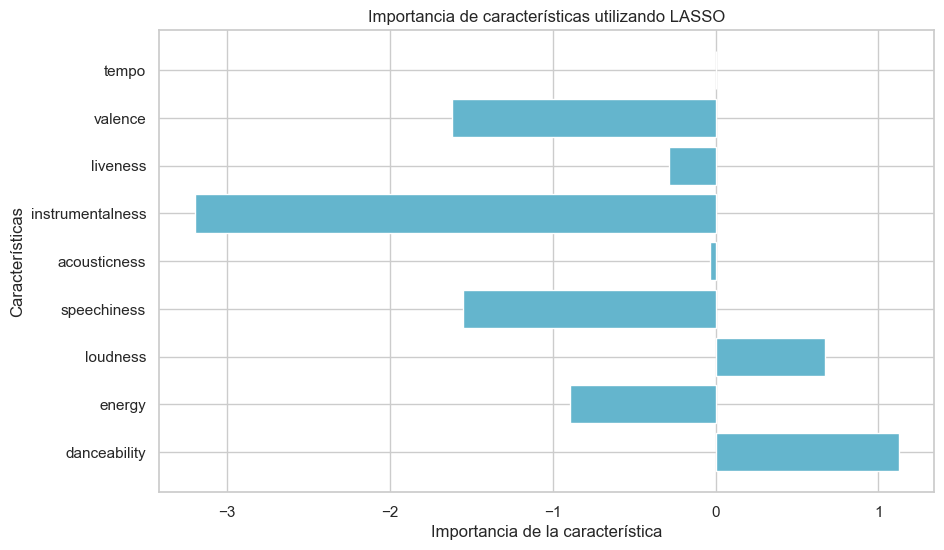

In [10]:
# Seleccionamos las características numéricas que queremos usar para la regresión
X = spotify[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
             'instrumentalness', 'liveness', 'valence', 'tempo']]  # Ajusta según las columnas numéricas disponibles

# Columna objetivo
y = spotify['popularity']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo LASSO
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Obtener los coeficientes (importancia de las características)
importancia = lasso.coef_

# Crear un gráfico de barras
caracteristicas = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                   'instrumentalness', 'liveness', 'valence', 'tempo']  # Tus columnas numéricas
plt.figure(figsize=(10, 6))
plt.barh(caracteristicas, importancia, color='c')
plt.xlabel("Importancia de la característica")
plt.ylabel("Características")
plt.title("Importancia de características utilizando LASSO")
plt.show()

## Explicación
Como se puede apreciar, al utilizar el metodo LASSO se puede determinar cuales son las variables mas importantes del Dataset (Target), a modo de observación se puede apreciar lo siguiente:

1) Los campos 'loudness' y 'danceability' tienen importancias positivas respecto a los demás campos, pero en el caso de 'loudness' su influencia es menor respecto al campo 'danceability'.
2) Los campos como 'valance', 'liveness', 'instrumentalness', 'acousticness', 'speechiness' y 'energy' tienen importancias negativas, lo que significa que para la busqueda del campo objetivo 'popularity', su influencia es negativa pero notable.

Conclución:

A modo de apreciación, se pueden destacar 3 variables que influyen a la hora de predecir la popularidad de las canciones, campos como 'danceability' y 'loudness' tienen una influencia menor pero positiva, en cambio, el campo que mas influye es 'instrumentalness', el cual, al ser de impacto negativo, a mayor valor tenga esta caracteristica, peor influye a la hora de predecir el campo objetivo. Por lo cual se ha decedido que estos 3 campos son los mas optados para predecir, ya que producen una influencia mayor respecto a los demas campos.

# Eliminación de característica

Se elimino. 
- Unnamed : 0
- artitst
- album_name
- track_id
- track_name
- explicit 
- time_signature
- mode
- duration_ms
- log_duration_ms

In [11]:
spotify.drop

<bound method DataFrame.drop of         Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113794      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113795      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113796      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113797      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113798      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1    

## Exploración nuevo DataSet "spotify"

## Correlation Matrix

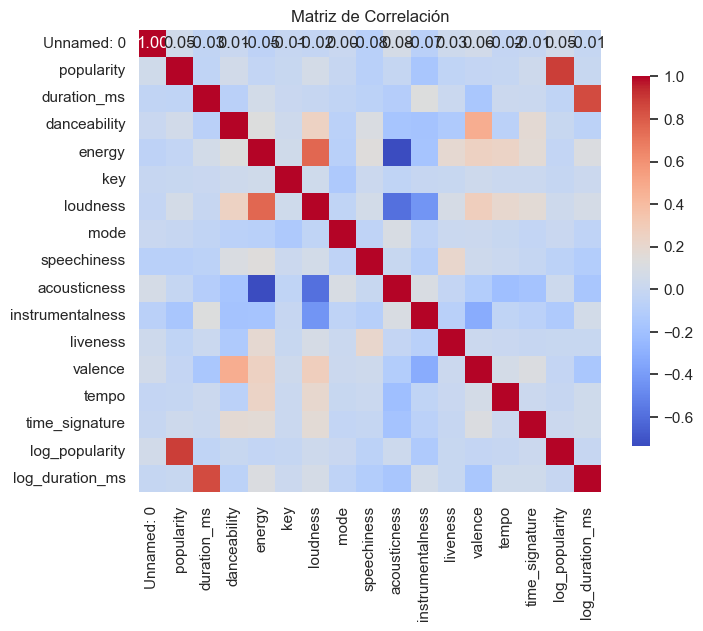

In [12]:
# Selección de Datos Numéricos
datosNumericos = spotify.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
matriz_correlacion = datosNumericos.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': .8})
plt.title('Matriz de Correlación')
plt.show()

## Información del DataSet

In [13]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113799 entries, 0 to 113798
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113799 non-null  int64  
 1   track_id          113799 non-null  object 
 2   artists           113798 non-null  object 
 3   album_name        113798 non-null  object 
 4   track_name        113798 non-null  object 
 5   popularity        113799 non-null  float64
 6   duration_ms       113799 non-null  float64
 7   explicit          113799 non-null  bool   
 8   danceability      113799 non-null  float64
 9   energy            113799 non-null  float64
 10  key               113799 non-null  int64  
 11  loudness          113799 non-null  float64
 12  mode              113799 non-null  int64  
 13  speechiness       113799 non-null  float64
 14  acousticness      113799 non-null  float64
 15  instrumentalness  113799 non-null  float64
 16  liveness          11

## Cantidad total de datos

In [14]:
spotify.dtypes.value_counts()

float64    13
object      5
int64       4
bool        1
Name: count, dtype: int64

# Futuro

El objetivo de este proyecto es desarrrollar un sistema de recomendación de música. Específicamente usando K-Means y K-Vecinos más cercanos (K-NN). Hemos utilizado el procedimiento previo para preparar el conjunto de datos. 
- Escalado de variables: La mayoría de las variables numéricas han sido escaladas. Para asegurar que todas las características sean similares.
- Eliminación de variables categóricas: Las variables categóricas se han eliminado o transformado con el método de Label Encoding, para evitar problemas con los algoritmos que no puedan procesar ese tipo de dato.

El sistema de recomendación funcionará agrupando canciones similares (K-Means) o sugiriendo canciones basadas a las características (K-NN). De esta forma se busca que el sistema pueda recomendar canciones que se alineen con el gusto del usuario.
Cabe recalcar que el método para lograr el objetivo puede cambiar al avanzar con el desarrollo y evaluación de los modelos. Nuestra intención es buscar el mejor modelo para nuestro Recomendador. 

# Save DataSet